Referências: 
1º https://matplotlib.org/3.1.0/gallery/pie_and_polar_charts/pie_and_donut_labels.html
2º https://leiaisso.net/zhw6a/

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Dados
data = {
    'Posicionamento Político': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 'N/S', 'N/R'],
    'porcentagem': [11, 2, 4, 4, 16, 7, 5, 8, 3, 22, 12, 5]
}

# Converter para DataFrame
df = pd.DataFrame(data)

# Mapear categorias para números (1 a 10)
categoria_map = {
    1: 'Esquerda',
    2: 'Esquerda',
    3: 'Esquerda',
    4: 'Centro-Esquerda',
    5: 'Centro',
    6: 'Centro',
    7: 'Centro-Direita',
    8: 'Direita',
    9: 'Direita',
    10: 'Direita',
    'N/S': 'N/S',
    'N/R': 'N/R'
}

# Com o map o valores de 1 a 10 serão atribuidos para esquerda, centro-esquerda, centro-direita 
df['Posicionamento Político'] = df['Posicionamento Político'].map(categoria_map)
df_agregado = df.groupby('Posicionamento Político')['porcentagem'].sum().reset_index()
df_agregado




,Posicionamento Político,2023
0,Centro,23
1,Centro-Direita,5
2,Centro-Esquerda,4
3,Direita,33
4,Esquerda,17
5,N/R,5
6,N/S,12


In [ ]:
plt.figure(figsize=(8, 6))
colors = {
    'Esquerda': '#DB7093',
    'Centro': '#D8BFD8',
    'Direita': '#663399',
    'Centro-Esquerda': '#DDA0DD',
    'Centro-Direita': '#7B68EE',
    'N/S': '#D3D3D3',
    'N/R': '#D3D3D3'
}
bars = plt.bar(df['Posicionamento Político'], df['2023'], color=[colors[c] for c in df['Posicionamento Político']])
plt.xlabel('Posicionamento Político')
plt.ylabel('Porcentagem (%)')
plt.title('Distribuição de Posicionamento Político em 2023')
plt.xticks(rotation=45)

# Adicionando rótulos com os valores
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.1f}%',  # Texto a ser exibido
                 xy=(bar.get_x() + bar.get_width() / 2, height),  # Posição do texto
                 xytext=(0, 3),  # Deslocamento vertical do texto
                 textcoords="offset points",
                 ha='center',  # Alinhamento horizontal
                 fontsize=8,  # Tamanho da fonte
                 color='black')  # Cor do texto

plt.show()

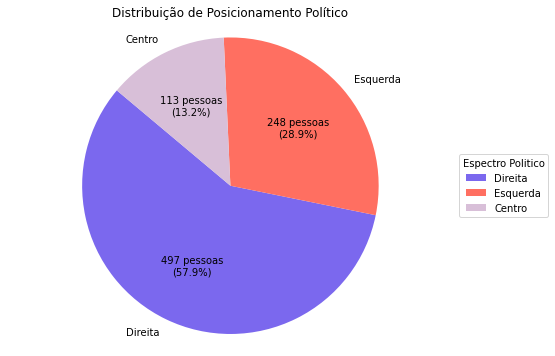

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))

# Dados
categorias = ['Direita', 'Esquerda', 'Centro']
porcentagens = [0.22, 0.11, 0.05]  # Calculando a porcentagem de 'Outras'

# Calculando o número de entrevistados para cada categoria
total_entrevistados = 2258
num_entrevistados = [round(total_entrevistados * valores) for valores in porcentagens]


# Função para adicionar o total de pessoas ao grafico
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:d} pessoas\n({:.1f}%)".format(absolute, pct)


# Criando o gráfico de pizza
colors = ['#7B68EE', '#FF6F61', '#D8BFD8']
# Criando os rotulos para serem utilizados no grafico
wedges, texts, autotexts = ax.pie(num_entrevistados, labels=categorias, colors=colors, autopct=lambda pct: func(pct, num_entrevistados), startangle=140)

# Legenda com as mesmas cores
ax.legend(wedges, categorias,
          title="Espectro Politico",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))


# Criando o gráfico de pizza
colors = ['#7B68EE', '#FF6F61', '#D8BFD8']
plt.axis('equal')  # Faz com que o gráfico de pizza seja circular
plt.title('Distribuição de Posicionamento Político')
plt.show()
